# Trabalho 3 - Classificação com MLPClassifier
## Análise Comparativa: KNN vs MLP Neural Network

## 1. Importação das Bibliotecas

In [40]:
# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas do Sklearn
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    classification_report
)

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Seed para reprodutibilidade
np.random.seed(42)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 1.1 Implementação do KNN Customizado

In [39]:
class MyKNN:
    """
    Implementação simplificada do algoritmo KNN (K-Nearest Neighbors).
    """

    def __init__(self, k=5):
        # número de vizinhos considerados
        self.k = k

    def fit(self, X, y):
        """
        Guarda os dados de treino.
        X -> matriz de características (features)
        y -> vetor de rótulos (labels)
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("X e y precisam ter o mesmo número de amostras.")
        if self.k > X.shape[0]:
            raise ValueError("k não pode ser maior que o número de amostras.")

        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)  # rótulos possíveis

    def _predict_one(self, x):
        """
        Faz a previsão para uma única amostra x.
        """
        # calcula distâncias euclidianas entre x e todos os pontos de treino
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        # pega os índices dos k vizinhos mais próximos
        neighbors_idx = np.argsort(distances)[:self.k]
        
        # pega os rótulos desses vizinhos
        neighbor_labels = self.y_train[neighbors_idx]
        
        # retorna o rótulo mais comum entre os vizinhos
        return np.bincount(neighbor_labels).argmax()

    def predict(self, X_test):
        """
        Faz previsões para várias amostras.
        """
        return np.array([self._predict_one(x) for x in X_test])

print("✅ Classe MyKNN implementada com sucesso!")

✅ Classe MyKNN implementada com sucesso!


## 2. Carregamento e Análise dos Datasets

In [41]:
# Carregar datasets
iris = load_iris()
wine = load_wine()

# Criar DataFrames para melhor visualização
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df['target_name'] = wine_df['target'].map({i: name for i, name in enumerate(wine.target_names)})

print("="*80)
print("DATASET IRIS")
print("="*80)
print(f"Dimensões: {iris_df.shape}")
print(f"Classes: {iris.target_names}")
print(f"\nPrimeiras linhas:")
display(iris_df.head())
print(f"\nDistribuição das classes:")
print(iris_df['target_name'].value_counts())

print("\n" + "="*80)
print("DATASET WINE")
print("="*80)
print(f"Dimensões: {wine_df.shape}")
print(f"Classes: {wine.target_names}")
print(f"\nPrimeiras linhas:")
display(wine_df.head())
print(f"\nDistribuição das classes:")
print(wine_df['target_name'].value_counts())

DATASET IRIS
Dimensões: (150, 6)
Classes: ['setosa' 'versicolor' 'virginica']

Primeiras linhas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Distribuição das classes:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

DATASET WINE
Dimensões: (178, 15)
Classes: ['class_0' 'class_1' 'class_2']

Primeiras linhas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0



Distribuição das classes:
target_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64


## 3. Preparação dos Dados

In [42]:
def preparar_dados(X, y, test_size=0.3, random_state=42):
    """
    Prepara os dados para treinamento:
    - Divide em treino e teste
    - Normaliza os dados usando StandardScaler
    """
    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Normalizar dados (importante para MLP)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Preparar dados do Iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preparar_dados(iris.data, iris.target)

# Preparar dados do Wine
X_train_wine, X_test_wine, y_train_wine, y_test_wine = preparar_dados(wine.data, wine.target)

print("✅ Dados preparados e normalizados!")
print(f"\nIris - Treino: {X_train_iris.shape}, Teste: {X_test_iris.shape}")
print(f"Wine - Treino: {X_train_wine.shape}, Teste: {X_test_wine.shape}")

✅ Dados preparados e normalizados!

Iris - Treino: (105, 4), Teste: (45, 4)
Wine - Treino: (124, 13), Teste: (54, 13)


## 4. Treinamento dos Classificadores

### 4.1 MLPClassifier (Multi-Layer Perceptron)

In [43]:
# Configuração do MLPClassifier
mlp_iris = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 camadas ocultas com 100 e 50 neurônios
    activation='relu',              # Função de ativação ReLU
    solver='adam',                  # Otimizador Adam
    max_iter=1000,                  # Número máximo de iterações
    random_state=42,
    early_stopping=True,            # Para evitar overfitting
    validation_fraction=0.1
)

mlp_wine = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Treinar MLPClassifier para Iris
print("Treinando MLPClassifier para dataset Iris...")
mlp_iris.fit(X_train_iris, y_train_iris)
print(f"✅ Treinamento concluído! Iterações: {mlp_iris.n_iter_}")

# Treinar MLPClassifier para Wine
print("\nTreinando MLPClassifier para dataset Wine...")
mlp_wine.fit(X_train_wine, y_train_wine)
print(f"✅ Treinamento concluído! Iterações: {mlp_wine.n_iter_}")

# Fazer predições
y_pred_mlp_iris = mlp_iris.predict(X_test_iris)
y_pred_mlp_wine = mlp_wine.predict(X_test_wine)

print("\n✅ Predições realizadas com MLPClassifier!")

Treinando MLPClassifier para dataset Iris...
✅ Treinamento concluído! Iterações: 18

Treinando MLPClassifier para dataset Wine...
✅ Treinamento concluído! Iterações: 18

✅ Predições realizadas com MLPClassifier!


### 4.2 MyKNN (Implementação Customizada) para Comparação

In [44]:
# Configuração do MyKNN (implementação customizada)
knn_iris = MyKNN(k=5)
knn_wine = MyKNN(k=5)

# Treinar KNN para Iris
print("Treinando MyKNN para dataset Iris...")
knn_iris.fit(X_train_iris, y_train_iris)
print("✅ Treinamento concluído!")

# Treinar KNN para Wine
print("\nTreinando MyKNN para dataset Wine...")
knn_wine.fit(X_train_wine, y_train_wine)
print("✅ Treinamento concluído!")

# Fazer predições
y_pred_knn_iris = knn_iris.predict(X_test_iris)
y_pred_knn_wine = knn_wine.predict(X_test_wine)

print("\n✅ Predições realizadas com MyKNN (implementação customizada)!")

Treinando MyKNN para dataset Iris...
✅ Treinamento concluído!

Treinando MyKNN para dataset Wine...
✅ Treinamento concluído!

✅ Predições realizadas com MyKNN (implementação customizada)!


## 5. Matrizes de Confusão

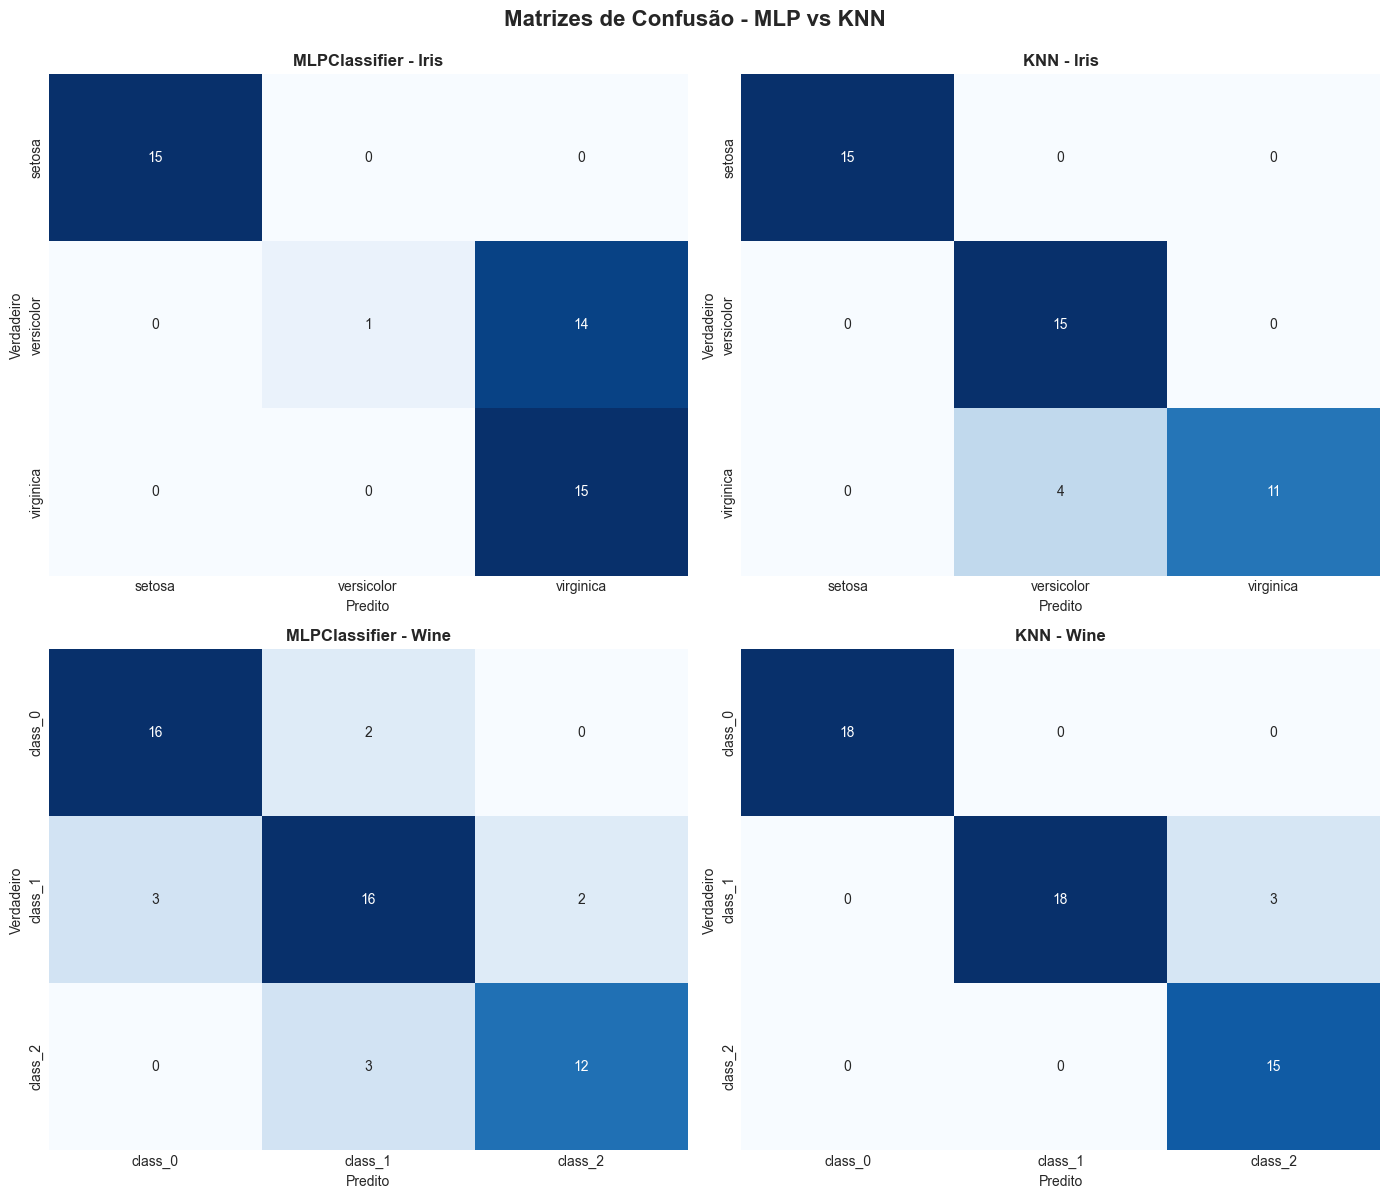

✅ Matrizes de confusão plotadas!


In [45]:
def plotar_matriz_confusao(y_true, y_pred, classes, titulo, ax):
    """
    Plota matriz de confusão com anotações
    """
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes, ax=ax, cbar=False)
    ax.set_title(titulo, fontsize=12, fontweight='bold')
    ax.set_ylabel('Verdadeiro', fontsize=10)
    ax.set_xlabel('Predito', fontsize=10)
    return cm

# Criar figura para matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Matrizes de Confusão - MLP vs KNN', fontsize=16, fontweight='bold', y=0.995)

# IRIS
plotar_matriz_confusao(y_test_iris, y_pred_mlp_iris, iris.target_names, 
                       'MLPClassifier - Iris', axes[0, 0])
plotar_matriz_confusao(y_test_iris, y_pred_knn_iris, iris.target_names, 
                       'KNN - Iris', axes[0, 1])

# WINE
plotar_matriz_confusao(y_test_wine, y_pred_mlp_wine, wine.target_names, 
                       'MLPClassifier - Wine', axes[1, 0])
plotar_matriz_confusao(y_test_wine, y_pred_knn_wine, wine.target_names, 
                       'KNN - Wine', axes[1, 1])

plt.tight_layout()
plt.show()

print("✅ Matrizes de confusão plotadas!")

## 6. Análise Comparativa: KNN vs MLPClassifier

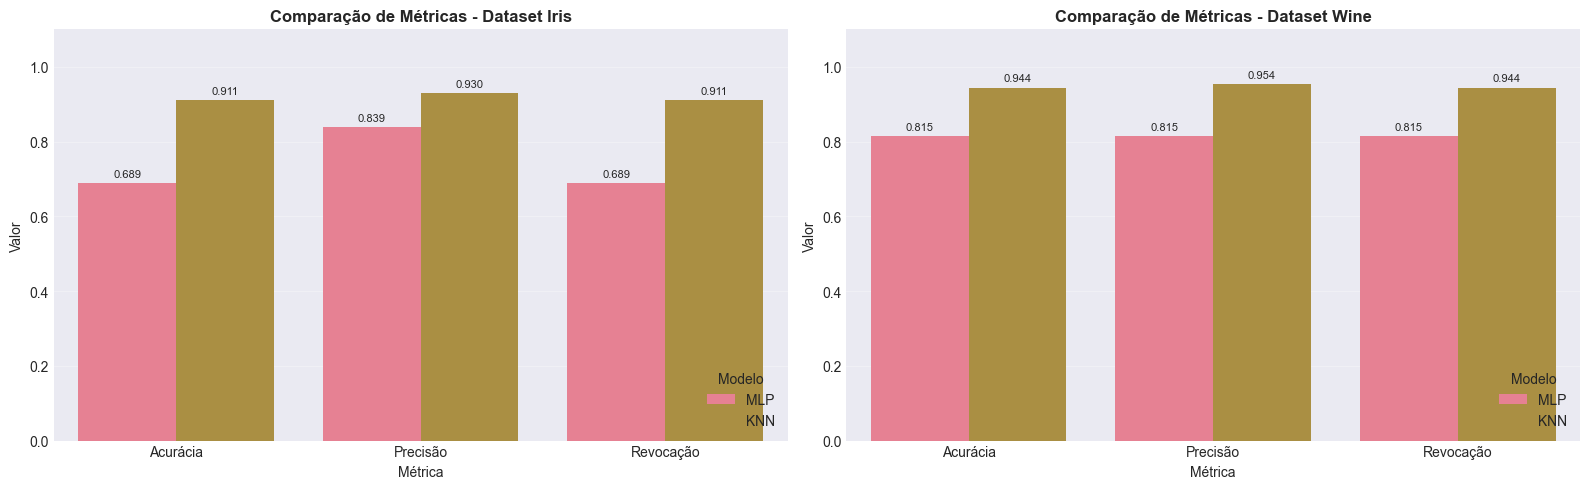

In [47]:
# Visualização comparativa das métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico para Iris
iris_results = df_resultados[df_resultados['Dataset'] == 'Iris']
iris_melted = iris_results.melt(id_vars=['Dataset', 'Modelo'], 
                                  var_name='Métrica', value_name='Valor')
sns.barplot(data=iris_melted, x='Métrica', y='Valor', hue='Modelo', ax=axes[0])
axes[0].set_title('Comparação de Métricas - Dataset Iris', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1.1)
axes[0].legend(title='Modelo', loc='lower right')
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f', padding=3, fontsize=8)

# Gráfico para Wine
wine_results = df_resultados[df_resultados['Dataset'] == 'Wine']
wine_melted = wine_results.melt(id_vars=['Dataset', 'Modelo'], 
                                 var_name='Métrica', value_name='Valor')
sns.barplot(data=wine_melted, x='Métrica', y='Valor', hue='Modelo', ax=axes[1])
axes[1].set_title('Comparação de Métricas - Dataset Wine', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1.1)
axes[1].legend(title='Modelo', loc='lower right')
axes[1].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f', padding=3, fontsize=8)

plt.tight_layout()
plt.show()